In [25]:
import pandas as pd
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [26]:
BASE_DIR = "/home/temp/data/eacl/ta"

In [27]:
df = pd.read_csv(f"{BASE_DIR}/tamil_valid_results_eacl_offensive_detection.csv")
df.head()

,sentence,label,robert_pred_label,robert_prob0,robert_prob1,robert_prob2,robert_prob3,robert_prob4,robert_prob5,robert_status,ulmfit_status,ulmfit_predicted_label,ulmfit_prob0,ulmfit_prob1,ulmfit_prob2,ulmfit_prob3,ulmfit_prob4,ulmfit_prob5
0,Handsome hunk keri vaa thalaivaa,0,0,0.967838,0.020767,0.002941,0.001473,0.004817,0.002164,True,True,0,0.958452,0.026347,0.005795,0.004828,0.002564,0.002014
1,thenkaachi maavattam naataar chamuthaayam chaa...,0,0,0.996796,0.000545,0.000411,0.001256,0.000365,0.000627,True,True,0,0.994374,0.001504,0.001327,0.002337,0.000091,0.000368
2,je vous aime bravo pour clip de merde que j éc...,4,4,0.023777,0.007050,0.021707,0.005527,0.937984,0.003956,True,True,4,0.368474,0.057283,0.073972,0.043093,0.446945,0.010233
3,chirappu melum ithu poonra pataippukal mika av...,0,0,0.995030,0.001468,0.000933,0.001382,0.000476,0.000710,True,True,0,0.956031,0.006871,0.008584,0.027196,0.000041,0.001277
4,Vera level BGM ..semma trailer. 🤞,0,0,0.996324,0.001533,0.000425,0.000475,0.000604,0.000638,True,True,0,0.933593,0.041170,0.003333,0.016792,0.002920,0.002191


In [28]:
weights = [0.1, 0.25, 0.5, 0.75, 0.9]
f1_scores = []
for robert_weight in weights:
    ulmfit_weight = 1 - robert_weight
    
    combined_0 = []
    combined_1 = []
    combined_2 = []
    combined_3 = []
    combined_4 = []
    combined_5 = []

    for index, row in df.iterrows():
        combined_0.append(ulmfit_weight*row['ulmfit_prob0'] + robert_weight*row['robert_prob0'])
        combined_1.append(ulmfit_weight*row['ulmfit_prob1'] + robert_weight*row['robert_prob1'])
        combined_2.append(ulmfit_weight*row['ulmfit_prob2'] + robert_weight*row['robert_prob2'])
        combined_3.append(ulmfit_weight*row['ulmfit_prob3'] + robert_weight*row['robert_prob3'])
        combined_4.append(ulmfit_weight*row['ulmfit_prob4'] + robert_weight*row['robert_prob4'])
        combined_5.append(ulmfit_weight*row['ulmfit_prob5'] + robert_weight*row['robert_prob5'])

    df['combined_0'] = combined_0
    df['combined_1'] = combined_1
    df['combined_2'] = combined_2
    df['combined_3'] = combined_3
    df['combined_4'] = combined_4
    df['combined_5'] = combined_5
    
    df['final_pred'] = df[['combined_0', 'combined_1', 'combined_2', 'combined_3', 'combined_4', 'combined_5']].idxmax(axis=1)

    df['final_pred'] =  df['final_pred'].apply(lambda x: x.split('_')[1])
    df['final_pred'] = df['final_pred'].astype(int)
    
    precision, recall, fscore, support = precision_recall_fscore_support(df['label'], df['final_pred'], average='weighted')
    
    print("RoBERTa Weight:", ulmfit_weight, precision, recall, fscore)
    
    f1_scores.append(fscore)

/home/ec2-user/anaconda3/envs/temp_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RoBERTa Weight: 0.9 0.7344433319069162 0.7832725615314494 0.7407218120760234
RoBERTa Weight: 0.75 0.7375266155382049 0.7839562443026435 0.7453353015789775
RoBERTa Weight: 0.5 0.745291489730433 0.7871467639015497 0.7556171535554584
RoBERTa Weight: 0.25 0.7412390494131946 0.7766636280765725 0.7540655805104167
RoBERTa Weight: 0.09999999999999998 0.7397685380739806 0.7707383773928898 0.7520037260310819


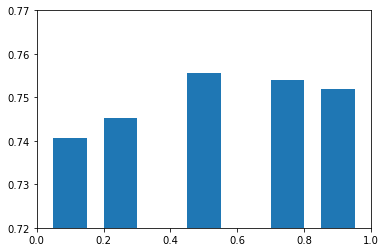

In [29]:
import matplotlib.pyplot as plt
import math
low = min(f1_scores)
high = max(f1_scores)
plt.ylim([0.72,0.77])
plt.xlim(0,1)
plt.bar(weights, f1_scores, alpha=1, align='center', width=0.1)
plt.show()

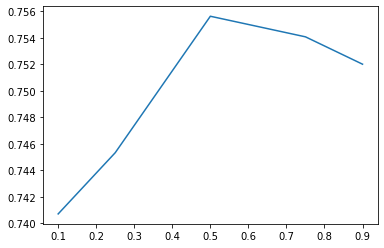

In [30]:
plt.plot(weights, f1_scores)      

In [31]:
df['final_pred'] = df[['combined_0', 'combined_1', 'combined_2', 'combined_3', 'combined_4', 'combined_5']].idxmax(axis=1)
df.head()

,sentence,label,robert_pred_label,robert_prob0,robert_prob1,robert_prob2,robert_prob3,robert_prob4,robert_prob5,robert_status,...,ulmfit_prob3,ulmfit_prob4,ulmfit_prob5,combined_0,combined_1,combined_2,combined_3,combined_4,combined_5,final_pred
0,Handsome hunk keri vaa thalaivaa,0,0,0.967838,0.020767,0.002941,0.001473,0.004817,0.002164,True,...,0.004828,0.002564,0.002014,0.966899,0.021325,0.003226,0.001809,0.004592,0.002149,combined_0
1,thenkaachi maavattam naataar chamuthaayam chaa...,0,0,0.996796,0.000545,0.000411,0.001256,0.000365,0.000627,True,...,0.002337,0.000091,0.000368,0.996554,0.000641,0.000502,0.001364,0.000337,0.000601,combined_0
2,je vous aime bravo pour clip de merde que j éc...,4,4,0.023777,0.007050,0.021707,0.005527,0.937984,0.003956,True,...,0.043093,0.446945,0.010233,0.058247,0.012073,0.026933,0.009283,0.888880,0.004584,combined_4
3,chirappu melum ithu poonra pataippukal mika av...,0,0,0.995030,0.001468,0.000933,0.001382,0.000476,0.000710,True,...,0.027196,0.000041,0.001277,0.991130,0.002008,0.001698,0.003964,0.000433,0.000767,combined_0
4,Vera level BGM ..semma trailer. 🤞,0,0,0.996324,0.001533,0.000425,0.000475,0.000604,0.000638,True,...,0.016792,0.002920,0.002191,0.990051,0.005497,0.000716,0.002107,0.000836,0.000793,combined_0


In [32]:
df['final_pred'] =  df['final_pred'].apply(lambda x: x.split('_')[1])
df.head()

,sentence,label,robert_pred_label,robert_prob0,robert_prob1,robert_prob2,robert_prob3,robert_prob4,robert_prob5,robert_status,...,ulmfit_prob3,ulmfit_prob4,ulmfit_prob5,combined_0,combined_1,combined_2,combined_3,combined_4,combined_5,final_pred
0,Handsome hunk keri vaa thalaivaa,0,0,0.967838,0.020767,0.002941,0.001473,0.004817,0.002164,True,...,0.004828,0.002564,0.002014,0.966899,0.021325,0.003226,0.001809,0.004592,0.002149,0
1,thenkaachi maavattam naataar chamuthaayam chaa...,0,0,0.996796,0.000545,0.000411,0.001256,0.000365,0.000627,True,...,0.002337,0.000091,0.000368,0.996554,0.000641,0.000502,0.001364,0.000337,0.000601,0
2,je vous aime bravo pour clip de merde que j éc...,4,4,0.023777,0.007050,0.021707,0.005527,0.937984,0.003956,True,...,0.043093,0.446945,0.010233,0.058247,0.012073,0.026933,0.009283,0.888880,0.004584,4
3,chirappu melum ithu poonra pataippukal mika av...,0,0,0.995030,0.001468,0.000933,0.001382,0.000476,0.000710,True,...,0.027196,0.000041,0.001277,0.991130,0.002008,0.001698,0.003964,0.000433,0.000767,0
4,Vera level BGM ..semma trailer. 🤞,0,0,0.996324,0.001533,0.000425,0.000475,0.000604,0.000638,True,...,0.016792,0.002920,0.002191,0.990051,0.005497,0.000716,0.002107,0.000836,0.000793,0


In [33]:
df['final_pred'].value_counts(), df['ulmfit_predicted_label'].value_counts(), df['robert_pred_label'].value_counts()

(0    3443
 1     384
 2     197
 3     188
 4     176
 Name: final_pred, dtype: int64,
 0    3819
 1     200
 4     165
 2     108
 3      96
 Name: ulmfit_predicted_label, dtype: int64,
 0    3402
 1     397
 2     215
 3     197
 4     177
 Name: robert_pred_label, dtype: int64)

In [34]:
INT_TO_LABEL_MAPPING = {0: 'Not_offensive', 1: 'Offensive_Untargetede', 2: 'Offensive_Targeted_Insult_Individual', 
                       3: 'Offensive_Targeted_Insult_Group', 4: 'not-Tamil', 5: 'Offensive_Targeted_Insult_Other'}
LABEL_TO_INT_MAPPING = {v:k for k,v in INT_TO_LABEL_MAPPING.items()}

In [35]:
df['final_pred'] = df['final_pred'].astype(int)

In [36]:
df['pred_label'] = df['final_pred'].apply(lambda x: INT_TO_LABEL_MAPPING[x])

In [41]:
df['label'] = df['label'].apply(lambda x: INT_TO_LABEL_MAPPING[x])

In [37]:
df.columns

Index(['sentence', 'label', 'robert_pred_label', 'robert_prob0',
       'robert_prob1', 'robert_prob2', 'robert_prob3', 'robert_prob4',
       'robert_prob5', 'robert_status', 'ulmfit_status',
       'ulmfit_predicted_label', 'ulmfit_prob0', 'ulmfit_prob1',
       'ulmfit_prob2', 'ulmfit_prob3', 'ulmfit_prob4', 'ulmfit_prob5',
       'combined_0', 'combined_1', 'combined_2', 'combined_3', 'combined_4',
       'combined_5', 'final_pred', 'pred_label'],
      dtype='object')

In [42]:
df

,sentence,label,robert_pred_label,robert_prob0,robert_prob1,robert_prob2,robert_prob3,robert_prob4,robert_prob5,robert_status,...,ulmfit_prob4,ulmfit_prob5,combined_0,combined_1,combined_2,combined_3,combined_4,combined_5,final_pred,pred_label
0,Handsome hunk keri vaa thalaivaa,Not_offensive,0,0.967838,0.020767,0.002941,0.001473,0.004817,0.002164,True,...,0.002564,0.002014,0.966899,0.021325,0.003226,0.001809,0.004592,0.002149,0,Not_offensive
1,thenkaachi maavattam naataar chamuthaayam chaa...,Not_offensive,0,0.996796,0.000545,0.000411,0.001256,0.000365,0.000627,True,...,0.000091,0.000368,0.996554,0.000641,0.000502,0.001364,0.000337,0.000601,0,Not_offensive
2,je vous aime bravo pour clip de merde que j éc...,not-Tamil,4,0.023777,0.007050,0.021707,0.005527,0.937984,0.003956,True,...,0.446945,0.010233,0.058247,0.012073,0.026933,0.009283,0.888880,0.004584,4,not-Tamil
3,chirappu melum ithu poonra pataippukal mika av...,Not_offensive,0,0.995030,0.001468,0.000933,0.001382,0.000476,0.000710,True,...,0.000041,0.001277,0.991130,0.002008,0.001698,0.003964,0.000433,0.000767,0,Not_offensive
4,Vera level BGM ..semma trailer. 🤞,Not_offensive,0,0.996324,0.001533,0.000425,0.000475,0.000604,0.000638,True,...,0.002920,0.002191,0.990051,0.005497,0.000716,0.002107,0.000836,0.000793,0,Not_offensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,mishkin -chinimaavin chaliththu poona vattath...,Not_offensive,0,0.566041,0.069429,0.201132,0.142119,0.003157,0.018122,True,...,0.001172,0.027521,0.564900,0.066442,0.193554,0.153084,0.002958,0.019062,0,Not_offensive
4384,Sivaji -Bhajii Sapdu Petta -Sweet Sapdu Seri...,Not_offensive,0,0.900810,0.020391,0.063159,0.009024,0.002030,0.004587,True,...,0.009265,0.017144,0.866547,0.024512,0.080320,0.020025,0.002753,0.005842,0,Not_offensive
4385,8k dislike sure all vijay fans,Offensive_Targeted_Insult_Other,1,0.261404,0.438101,0.075188,0.195035,0.005745,0.024526,False,...,0.008270,0.053432,0.280822,0.414586,0.073577,0.197601,0.005997,0.027417,1,Offensive_Untargetede
4386,Lady super star Manju warrier Fans Hit like,Not_offensive,0,0.996431,0.000757,0.000539,0.000903,0.000856,0.000515,True,...,0.004108,0.001796,0.994038,0.001212,0.001004,0.001923,0.001181,0.000643,0,Not_offensive


In [43]:
df.shape

(4388, 26)

In [44]:
df['label'].value_counts()

Not_offensive                           3193
Offensive_Untargetede                    356
Offensive_Targeted_Insult_Individual     307
Offensive_Targeted_Insult_Group          295
not-Tamil                                172
Offensive_Targeted_Insult_Other           65
Name: label, dtype: int64

In [46]:
print(accuracy_score(df['label'], df['pred_label']))

0.7707383773928898


In [47]:
precision_recall_fscore_support(df['label'], df['pred_label'], average='weighted')

/home/ec2-user/anaconda3/envs/temp_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7397685380739806, 0.7707383773928898, 0.7520037260310819, None)

In [48]:
df['pred_label'].value_counts(), df['robert_pred_label'].value_counts(), df['ulmfit_predicted_label'].value_counts(), df['label'].value_counts()

(Not_offensive                           3443
 Offensive_Untargetede                    384
 Offensive_Targeted_Insult_Individual     197
 Offensive_Targeted_Insult_Group          188
 not-Tamil                                176
 Name: pred_label, dtype: int64,
 0    3402
 1     397
 2     215
 3     197
 4     177
 Name: robert_pred_label, dtype: int64,
 0    3819
 1     200
 4     165
 2     108
 3      96
 Name: ulmfit_predicted_label, dtype: int64,
 Not_offensive                           3193
 Offensive_Untargetede                    356
 Offensive_Targeted_Insult_Individual     307
 Offensive_Targeted_Insult_Group          295
 not-Tamil                                172
 Offensive_Targeted_Insult_Other           65
 Name: label, dtype: int64)

In [49]:
df.to_csv('ensemble_res.csv', index=False)